# Experiment 1

In [15]:
import pandas as pd
import numpy as np

import quantstats as qs
from tinycta.portfolio import Portfolio

In [16]:
# Load prices
prices = pd.read_csv("data/p_ob.csv", index_col=0, parse_dates=True).ffill().truncate(before="1970-01-01")

In [17]:
# take two moving averages and apply sign-functiond
def f(price, fast=32, slow=96):
    s = price.ewm(com=slow, min_periods=100).mean()
    f = price.ewm(com=fast, min_periods=100).mean()
    return np.sign(f-s) 

In [18]:
from ipywidgets import Label, HBox, VBox, IntSlider

fast = IntSlider(min=4, max=192, step=4, value=32)
slow = IntSlider(min=4, max=192, step=4, value=96)
left_box = VBox([Label("Fast Moving Average"), Label("Slow Moving Average")])
right_box = VBox([fast, slow])
HBox([left_box, right_box])

In [19]:
portfolio = Portfolio(prices=prices, position=prices.apply(f, fast=fast.value, slow=slow.value))

                    Strategy
------------------  ----------
Start Period        1971-01-04
End Period          2020-08-31
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   7.23%
CAGR﹪              0.14%

Sharpe              0.49
Prob. Sharpe Ratio  99.98%
Sortino             0.71
Sortino/√2          0.5
Omega               1.1

Max Drawdown        -1.74%
Longest DD Days     2344

Gain/Pain Ratio     0.1
Gain/Pain (1M)      0.54

Payoff Ratio        1.01
Profit Factor       1.1
Common Sense Ratio  1.12
CPC Index           0.58
Tail Ratio          1.01
Outlier Win Ratio   3.96
Outlier Loss Ratio  4.33

MTD                 -0.12%
3M                  -0.28%
6M                  -0.49%
YTD                 -0.54%
1Y                  -0.6%
3Y (ann.)           -0.34%
5Y (ann.)           -0.3%
10Y (ann.)          -0.05%
All-time (ann.)     0.14%

Avg. Drawdown       -0.06%
Avg. Drawdown Days  51
Recovery Factor     4.15
Ulcer Index         0.0
Serenity Index      0.46


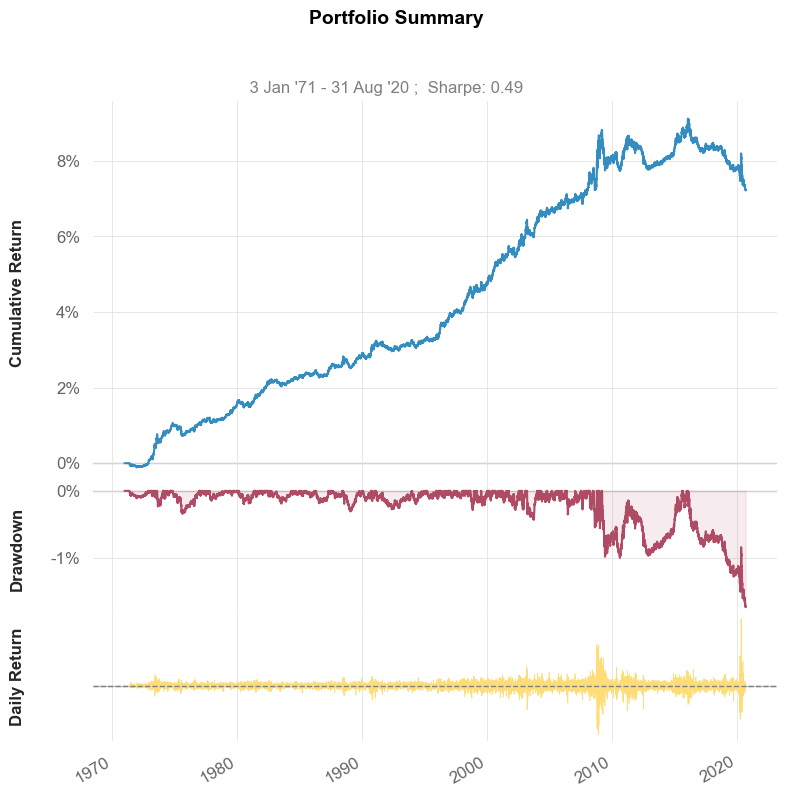

/Users/a13069q/github/cs/.venv/lib/python3.9/site-packages/quantstats/stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


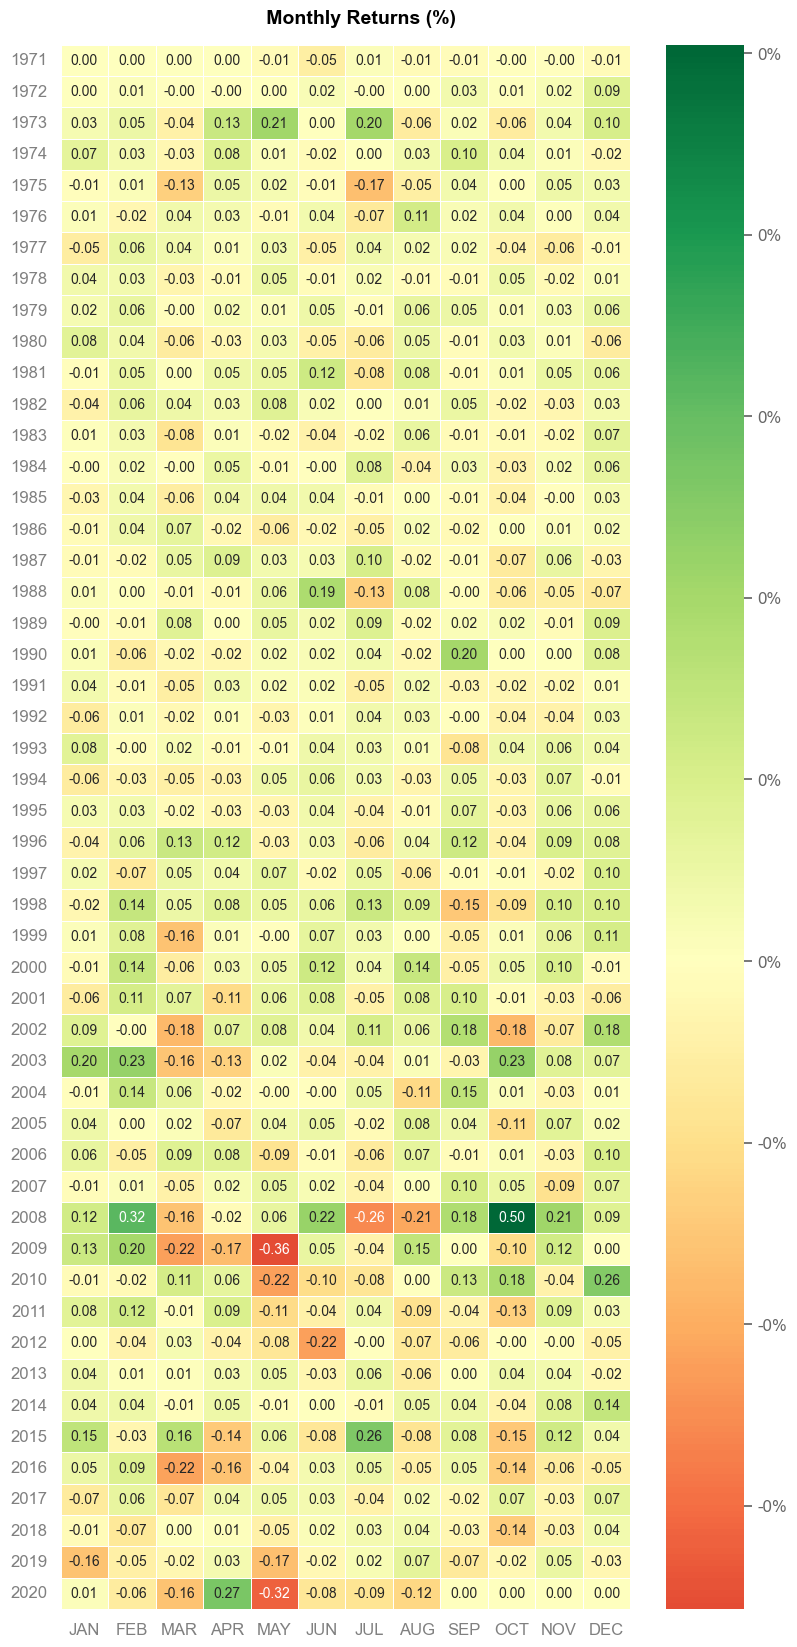

In [21]:
qs.reports.basic(portfolio.returns(init_capital=1000))

Results do not look terrible but...
* No concept of risk integrated. 
* The size of each bet is constant regardless of the underlying asset.
* The system lost its mojo in 2009 and has never really recovered.
* The sign function is very expensive to trade as position changes are too extreme.

Such fundamental flaws are not addressed by **parameter-hacking** or **pimp-my-trading-system** steps (remove the worst performing assets, insane quantity of stop-loss limits, ...)

